In [48]:
# 참조
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [49]:
#파일 불러오기
df = pd.read_csv("C:/Users/tisxo/AI_class/data/seeds_dataset.txt", sep=r'\s+', header=None)

In [50]:
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [51]:
df.columns = [
    "Area", "Perimeter", "Compactness", "Kernel_Length",
    "Kernel_Width", "Asymmetry_Coeff", "Groove_Length", "Class"
]

In [52]:
df.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [33]:
# 클래스 레이블을 0부터 시작하게 조정 (0, 1, 2)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values - 1 

In [34]:
# 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [36]:
# one-hot 인코딩
y_train_cat = keras.utils.to_categorical(y_train, 3)
y_test_cat = keras.utils.to_categorical(y_test, 3)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 7), (42, 7), (168,), (42,))

In [38]:
# 모델 정의
model = Sequential()
model.add(Dense(units=16, input_shape=(7,), activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

C:\Users\tisxo\anaconda3\envs\ai-env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# 모델 학습
model_history = model.fit(
    x = X_train,
    y = y_train_cat,  # 원-핫 인코딩한 레이블
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test_cat)
)

# 예측 확률
y_pred = model.predict(X_test)

# 클래스 인덱스로 변환 (0, 1, 2)
y_test_class = np.argmax(y_test_cat, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3486 - loss: 1.2234 - val_accuracy: 0.3095 - val_loss: 1.1393
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3582 - loss: 1.0587 - val_accuracy: 0.3095 - val_loss: 1.0395
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3280 - loss: 1.0072 - val_accuracy: 0.3095 - val_loss: 0.9538
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3165 - loss: 0.9364 - val_accuracy: 0.3333 - val_loss: 0.8819
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3718 - loss: 0.8274 - val_accuracy: 0.5238 - val_loss: 0.8219
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5161 - loss: 0.7775 - val_accuracy: 0.6667 - val_loss: 0.7703
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5689 - loss: 0.7695 - val_accuracy: 0.7143 - val_loss: 0.7259
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6595 - loss: 0.7239 - val_accuracy: 0.7143 - val_loss: 0.6873


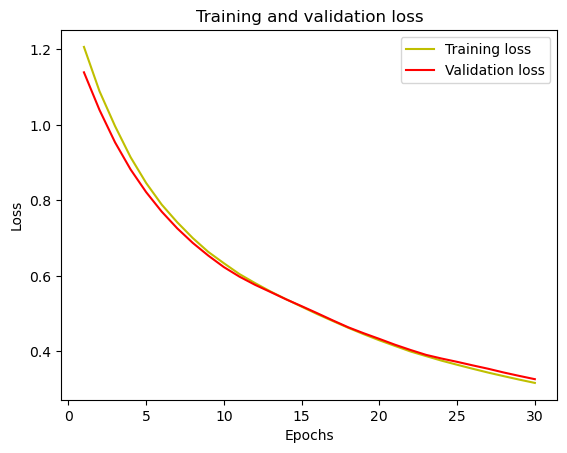

In [45]:
# 손실 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

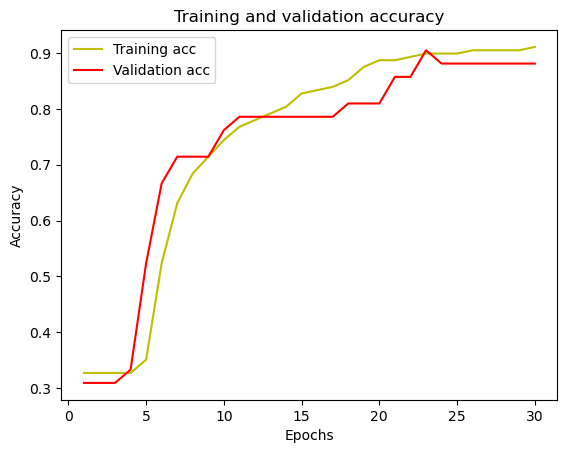

In [46]:
#정확도 시각화
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
#혼동행렬
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.87      0.93      0.90        14
           2       0.88      1.00      0.93        14

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42

[[10  2  2]
 [ 1 13  0]
 [ 0  0 14]]
